### E-commerce Data
**Actual transaction from UK retailer**

**Introduction**

This notebook presents an **end-to-end analysis** of an E-Commerce transactions dataset, which contains actual sales data from a UK-based online retailer.

The analysis covers the complete data workflow, including:
- Understanding the dataset structure
- Data cleaning and preprocessing
- Handling missing values
- Converting and standardizing date formats
- Identifying and treating negative values (returns and cancellations)
- Removing invalid or inconsistent records
- Creating new calculated fields such as revenue


After data cleaning, **Exploratory Data Analysis (EDA)** and visualizations are performed to uncover key business insights. The notebook includes the following visual analyses:
- **Top 10 Products by Quantity Across Countries**
- **Top 10 Countries by Total Revenue**
- **Monthly Revenue Trend Over Time**
- **Top 10 Customers by Revenue**

The objective of this notebook is to demonstrate **real-world data analysis skills**, starting from raw transactional data and ending with meaningful business insights that can be further used for reporting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
store = pd.read_csv(r"E-commerce dataset/data.csv",encoding = 'latin1')
store

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France


In [3]:
store.shape

(541909, 8)

In [4]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
store.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
store['InvoiceDate'] = pd.to_datetime(store['InvoiceDate'], format = 'mixed')

In [7]:
store.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [8]:
store.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
store.fillna({'Description':'Unknown'},inplace = True)

In [10]:
store.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
store.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [12]:
store['CustomerID'].isnull().sum()

np.int64(135080)

In [13]:
store = store.dropna(subset=['CustomerID'])

In [14]:
store.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [15]:
store.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [16]:
store.shape

(406829, 8)

In [17]:
store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [18]:
store = store.astype({'CustomerID':int})

In [19]:
store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [20]:
store.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [21]:
# Check negative points
store[store['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [22]:
store.duplicated().sum()

np.int64(5225)

In [23]:
store =store.drop_duplicates()

In [24]:
store.duplicated().sum()

np.int64(0)

In [25]:
store.shape

(401604, 8)

In [26]:
store.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401604.000000,401604,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.283037,NaN,69.764035,1714.006089


In [27]:
store["Quantity"].min()

np.int64(-80995)

In [28]:
store = store[store['Quantity']>0]

In [29]:
store['Quantity'].min()

np.int64(1)

In [30]:
store.shape

(392732, 8)

In [31]:
store.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392732.000000,392732,392732.000000,392732.000000
mean,13.153718,2011-07-10 19:15:24.576301568,3.125596,15287.734822
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,181.588420,NaN,22.240725,1713.567773


In [32]:
store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  int64         
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


In [33]:
store.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [34]:
store.value_counts().head()

InvoiceNo  StockCode  Description                          Quantity  InvoiceDate          UnitPrice  CustomerID  Country       
536365     21730      GLASS STAR FROSTED T-LIGHT HOLDER    6         2010-12-01 08:26:00  4.25       17850       United Kingdom    1
           22752      SET 7 BABUSHKA NESTING BOXES         2         2010-12-01 08:26:00  7.65       17850       United Kingdom    1
           71053      WHITE METAL LANTERN                  6         2010-12-01 08:26:00  3.39       17850       United Kingdom    1
           84029E     RED WOOLLY HOTTIE WHITE HEART.       6         2010-12-01 08:26:00  3.39       17850       United Kingdom    1
           84029G     KNITTED UNION FLAG HOT WATER BOTTLE  6         2010-12-01 08:26:00  3.39       17850       United Kingdom    1
Name: count, dtype: int64

In [35]:
store.groupby('Country')[['UnitPrice','Quantity']].sum().head(10)

,UnitPrice,Quantity
Country,,
Australia,3605.75,84199
Austria,1693.90,4881
Bahrain,78.95,260
Belgium,7372.85,23237
Brazil,142.60,356
Canada,910.58,2763
Channel Islands,3388.00,9485
Cyprus,3466.15,6340
Czech Republic,78.27,671


In [36]:
store.groupby('Description')['Quantity'].sum().reset_index()

,Description,Quantity
0,4 PURPLE FLOCK DINNER CANDLES,138
1,50'S CHRISTMAS GIFT BAG LARGE,1885
2,DOLLY GIRL BEAKER,2394
3,I LOVE LONDON MINI BACKPACK,359
4,I LOVE LONDON MINI RUCKSACK,1
...,...,...
3872,ZINC T-LIGHT HOLDER STARS SMALL,4894
3873,ZINC TOP 2 DOOR WOODEN SHELF,10
3874,ZINC WILLIE WINKIE CANDLE STICK,2606
3875,ZINC WIRE KITCHEN ORGANISER,25


In [37]:
store.groupby('Description')['UnitPrice'].mean().reset_index()

,Description,UnitPrice
0,4 PURPLE FLOCK DINNER CANDLES,2.312162
1,50'S CHRISTMAS GIFT BAG LARGE,1.248073
2,DOLLY GIRL BEAKER,1.243704
3,I LOVE LONDON MINI BACKPACK,4.138406
4,I LOVE LONDON MINI RUCKSACK,4.150000
...,...,...
3872,ZINC T-LIGHT HOLDER STARS SMALL,0.836975
3873,ZINC TOP 2 DOOR WOODEN SHELF,16.950000
3874,ZINC WILLIE WINKIE CANDLE STICK,0.872461
3875,ZINC WIRE KITCHEN ORGANISER,7.175000


In [38]:
store.groupby('Country').agg({
    'StockCode': 'count',
    'InvoiceNo': 'nunique'
}).head(15)

,StockCode,InvoiceNo
Country,,
Australia,1184,57
Austria,398,17
Bahrain,17,2
Belgium,2031,98
Brazil,32,1
Canada,151,6
Channel Islands,747,26
Cyprus,603,16
Czech Republic,25,2


In [39]:
store = store[(store['Quantity'] > 0) & (store['UnitPrice'] > 0)]

In [40]:
store['Revenue']= store['Quantity']*store['UnitPrice']

In [41]:
monthly_revenue = (store.groupby(store['InvoiceDate'].dt.to_period('M'))['Revenue']
    .sum()
    .reset_index()
)


In [42]:
monthly_revenue['InvoiceDate'] = monthly_revenue['InvoiceDate'].astype(str)


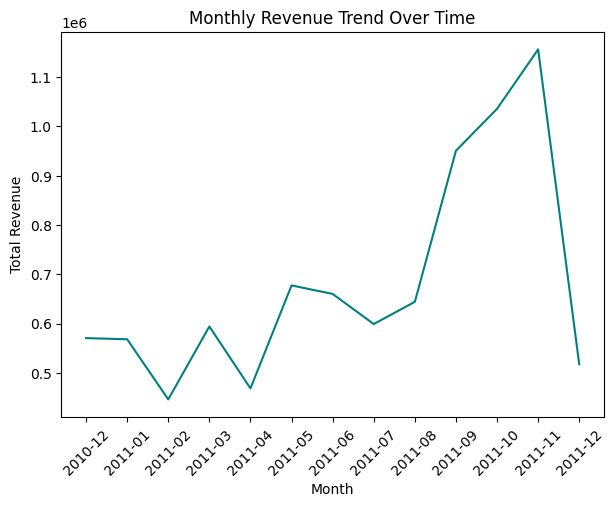

In [43]:
plt.figure(figsize = (7,5))
plt.plot(monthly_revenue['InvoiceDate'],
         monthly_revenue['Revenue'],color = 'teal')
plt.title('Monthly Revenue Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

In [44]:
store['Country'].value_counts()

Country
United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


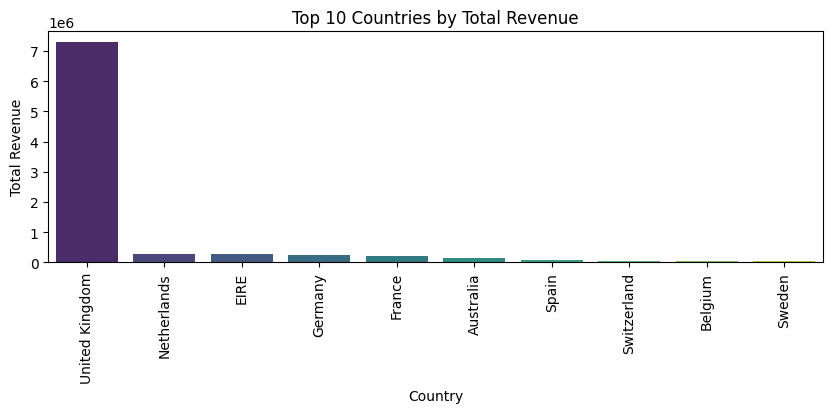

In [45]:
country_revenue= store.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize = (10,3))
sns.barplot(x = country_revenue.index, y = country_revenue.values,  hue=country_revenue.index, palette = 'viridis')
plt.xticks(rotation = 90)
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.title("Top 10 Countries by Total Revenue")
plt.show()


In [46]:
quantity_description = (store.groupby(['Description','Country'])['Quantity'].sum().sort_values(ascending = False).head(10).reset_index())

In [47]:
quantity_description 

,Description,Country,Quantity
0,"PAPER CRAFT , LITTLE BIRDIE",United Kingdom,80995
1,MEDIUM CERAMIC TOP STORAGE JAR,United Kingdom,76919
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,United Kingdom,49086
3,JUMBO BAG RED RETROSPOT,United Kingdom,41878
4,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,34630
5,ASSORTED COLOUR BIRD ORNAMENT,United Kingdom,32628
6,POPCORN HOLDER,United Kingdom,28923
7,PACK OF 12 LONDON TISSUES,United Kingdom,24321
8,BROCADE RING PURSE,United Kingdom,22675
9,PACK OF 72 RETROSPOT CAKE CASES,United Kingdom,22442


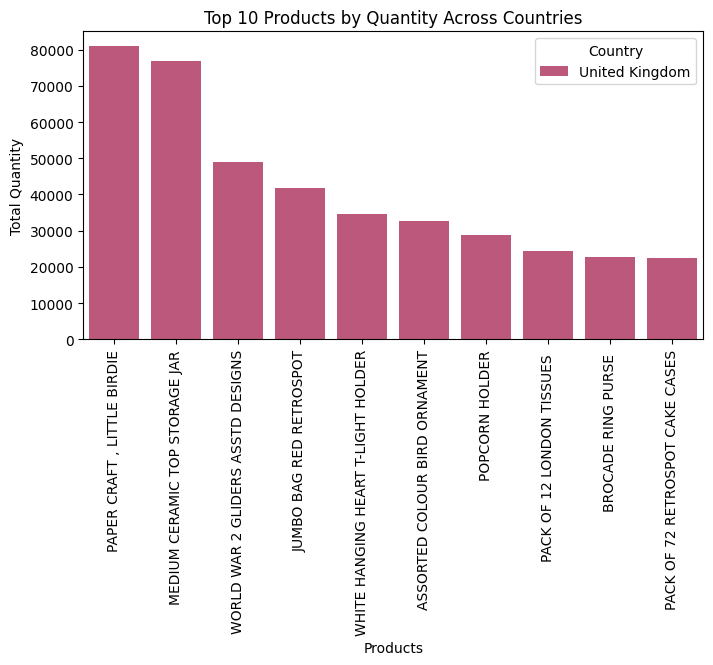

In [48]:
plt.figure(figsize = (8,4))
sns.barplot(x = 'Description', y = 'Quantity', hue = 'Country',data = quantity_description, palette = "plasma")
plt.xticks(rotation =90)
plt.xlabel("Products")
plt.ylabel("Total Quantity")
plt.title("Top 10 Products by Quantity Across Countries")
plt.show()

In [49]:
store['CustomerID'].value_counts().head(10).reset_index()

,CustomerID,count
0,17841,7676
1,14911,5670
2,14096,5111
3,12748,4412
4,14606,2677
5,15311,2366
6,14646,2076
7,13089,1814
8,13263,1667
9,14298,1637


In [50]:
customer_revenue = (store.groupby('CustomerID')['Revenue'].sum().sort_values(ascending = False).head(10).reset_index())

In [51]:
customer_revenue

,CustomerID,Revenue
0,14646,280206.02
1,18102,259657.30
2,17450,194390.79
3,16446,168472.50
4,14911,143711.17
5,12415,124914.53
6,14156,117210.08
7,17511,91062.38
8,16029,80850.84
9,12346,77183.60


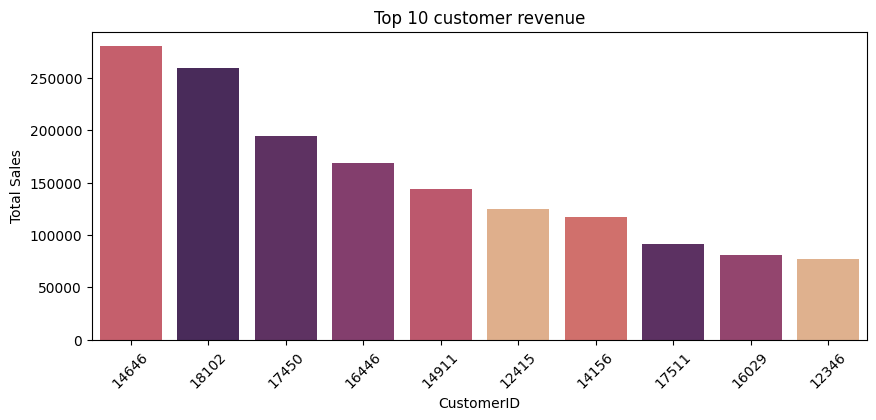

In [52]:
plt.figure(figsize = (10,4))
sns.barplot(x = 'CustomerID', y = 'Revenue', hue ='CustomerID', data = customer_revenue, palette = 'flare', legend = False, order=customer_revenue['CustomerID'] )
plt.xlabel('CustomerID')
plt.ylabel('Total Sales')
plt.xticks(rotation = 45)
plt.title("Top 10 customer revenue")
plt.show()

In [53]:
store.to_csv("ecommerce_data.csv", index=False)
